== 1 ==
minutia time: 2.2556915283203125
Match results!
PROGRAM OUTPUT: CompletedProcess(args=['./MasterPrintMatchImageCapacitive', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/FINGERPRINT_DATASETS/DB7AuthentecCapacitivePress/', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/spoof_print_temp.png_featurelarge.dat', '35', '0'], returncode=0, stdout='Licenses for Biometrics.FingerExtraction,Biometrics.FingerMatching not available\n')
match results: 2.2196593284606934
0
== 2 ==
minutia time: 2.2606570720672607
Match results!
PROGRAM OUTPUT: CompletedProcess(args=['./MasterPrintMatchImageCapacitive', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/FINGERPRINT_DATASETS/DB7AuthentecCapacitivePress/', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/spoof_print_temp.png_featurelarge.dat', '35', '0'], returncode=0, stdout='Licenses for Biometrics.FingerExtraction,Biometrics.FingerMatching not available\n')
match results: 2.2556636333465576


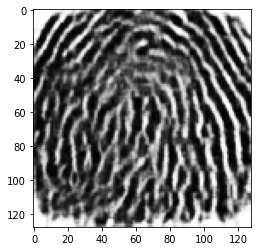

In [1]:
#subjects only
import sub_verifinger as sv
# import verifinger as sv
import numpy as np
import keras
import matplotlib.pyplot as plt
import time

#get the generator (VAE)
DATASET = 'CAPACITIVE'
VAE_SIZE = 32
vae_gen = keras.models.load_model(f"../autoencoder_models/print_{DATASET}_var_decoder-{VAE_SIZE}.h5")

fake_print = vae_gen.predict(np.random.normal(0,1,size=(1,100)))
plt.imshow(fake_print.squeeze(),cmap='binary')

fake_print2 = vae_gen.predict(np.random.normal(0,1,size=(1,100)))
plt.imshow(fake_print2.squeeze(),cmap='binary')

# st = time.time()
print("== 1 ==")
print(sv.score(fake_print,'capacitive',35))
print("== 2 ==")
print(sv.score(fake_print2,'capacitive',35))
# print(time.time()-st)

In [2]:

# import images

from keras.preprocessing.image import img_to_array, ImageDataGenerator
from PIL import Image
import os
from tqdm import tqdm
import numpy as np

def load_capacitive_data(dirname = "FINGERPRINT_DATASETS/DB7AuthentecCapacitivePress/"):
    imgs_names = os.listdir(dirname)
    
    #Prep Images
    X = []
    Y = []
    with tqdm(total=len(imgs_names)) as pbar:
        for i in imgs_names:
            if(i.endswith('.BMP')):
                im = Image.open(dirname + i)
                im = im.crop((8, 8, 136, 136))
                im = im.convert('L')
                im = img_to_array(im)
                im = (255 - im) / 255.0    #normalize [0,1]
                #im = (127.5-im) / 127.5   #normalize [-1,1]


                Y.append(i)
                X.append(im)
            pbar.update(1)
    
    X_train = np.array(X)
    Y_train = np.array(Y)
    
    return X_train, Y_train

X_train, y_train = load_capacitive_data()
y_clean = list(map(lambda x: int(x.split("_")[1]),y_train))


100%|██████████| 26047/26047 [00:02<00:00, 9047.14it/s]


In [3]:
#resize training
import os
for i in range(96):
    x = X_train[i]
    x_img = Image.fromarray(255-(x.squeeze()*255.).astype(np.uint8), mode="L")
    x_img = x_img.resize((150, 150), Image.ANTIALIAS)
    n = os.getcwd() + "/FINGERPRINT_DATASETS/Cap_Large/" + y_train[i]
    x_img.save(n)

In [4]:
print(y_train[0])

AES3400_0498_08.BMP


In [6]:
import new_verifinger as nv

#enroll fingers
for i in range(len(X_train)):
    x = X_train[i]
    fn = y_train[i].split(".")[0]
    nv.enrollFingerIMG(x,fn)

ModuleNotFoundError: No module named 'new_verifinger'

### SUB VERIFINGER

--train--


AttributeError: module 'verifinger' has no attribute 'usersMatched'

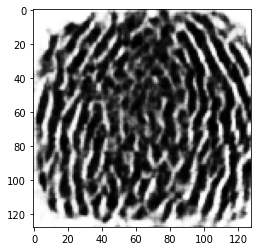

In [1]:
#subjects only
# import sub_verifinger as sv
import verifinger as sv
import numpy as np
import keras
import matplotlib.pyplot as plt
import time

#get the generator (VAE)
DATASET = 'CAPACITIVE'
VAE_SIZE = 32
vae_gen = keras.models.load_model(f"../autoencoder_models/print_{DATASET}_var_decoder-{VAE_SIZE}.h5")

fake_print = vae_gen.predict(np.random.normal(0,1,size=(1,100)))
plt.imshow(fake_print.squeeze(),cmap='binary')

st = time.time()
print('--train--')
print(sv.usersMatched(fake_print,'capacitive',35,"temp","train"))
print('--test--')
print(sv.usersMatched(fake_print,'capacitive',35,"temp","test"))
print('--full--')
print(sv.usersMatched(fake_print,'capacitive',35,"temp"))
print(time.time()-st)

== 1 ==
minutia time: 2.248539924621582
match results: 2.291123390197754
0
== 2 ==
minutia time: 2.2306182384490967
match results: 2.259153127670288
0
9.032660245895386


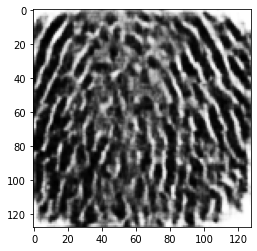

In [17]:
#subjects only
# import sub_verifinger as sv
import verifinger as sv
import numpy as np
import keras
import matplotlib.pyplot as plt
import time

#get the generator (VAE)
DATASET = 'CAPACITIVE'
VAE_SIZE = 32
vae_gen = keras.models.load_model(f"../autoencoder_models/print_{DATASET}_var_decoder-{VAE_SIZE}.h5")

fake_print = vae_gen.predict(np.random.normal(0,1,size=(1,100)))
plt.imshow(fake_print.squeeze(),cmap='binary')

fake_print2 = vae_gen.predict(np.random.normal(0,1,size=(1,100)))
plt.imshow(fake_print2.squeeze(),cmap='binary')

st = time.time()
print("== 1 ==")
print(sv.score(fake_print,'capacitive',35))
print("== 2 ==")
print(sv.score(fake_print2,'capacitive',35))
print(time.time()-st)

In [15]:
print(fake_print.shape)
print(X_train[0].shape)

print(np.unique(fake_print))
print(np.unique(X_train[0]))

print(type(fake_print))
print(type(X_train[0]))

(1, 128, 128, 1)
(128, 128, 1)
[1.2678921e-12 1.0038107e-11 4.3771032e-11 ... 9.6024388e-01 9.6024466e-01
 9.6033883e-01]
[0.         0.24705882 0.37254903 0.49803922 0.62352943 0.7490196
 0.8745098  1.        ]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
#print(sv.usersMatched(1-fake_print,'capacitive',35,"test"))

['38' '40' '42' '43' '44' '45' '119' '121' '122' '123' '124' '126' '128'
 '131' '134' '136' '139' '143' '145' '149' '154' '166' '194' '205' '206'
 '218' '219' '220' '223' '230' '251' '256' '272' '284' '297' '298' '300'
 '301' '302' '303' '310' '323' '326' '327' '336' '343' '358' '359' '366'
 '373' '389' '397' '427' '436' '455' '472' '507' '519' '527' '538' '542'
 '546' '556' '559' '569' '576' '577' '581' '590' '593' '595' '596' '600'
 '604' '620' '621' '626' '627' '639' '649' '652' '654' '665' '666' '668'
 '671' '680' '683' '688' '689' '690' '693' '694']


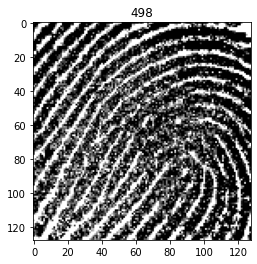

In [10]:
plt.title(y_clean[0])
plt.imshow(X_train[0].squeeze(),cmap='binary')

In [6]:
# should match user
for FMR in [35,50,65]:
    userMatch = sv.usersMatched(X_train[0].squeeze(),'capacitive',FMR)
    print(f"predicted: {userMatch}\treal:{y_clean[0]-1}")

CompletedProcess(args=['./MasterPrintSubjectMatcher_MILK', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/FINGERPRINT_DATASETS/DB7AuthentecCapacitivePress/', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/spoof_print_temp.png_featurelarge.dat', '35', '0'], returncode=0, stdout='Licenses for Biometrics.FingerExtraction,Biometrics.FingerMatching not available\n')
predicted: []	real:497
CompletedProcess(args=['./MasterPrintSubjectMatcher_MILK', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/FINGERPRINT_DATASETS/DB7AuthentecCapacitivePress/', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/spoof_print_temp.png_featurelarge.dat', '50', '0'], returncode=0, stdout='Licenses for Biometrics.FingerExtraction,Biometrics.FingerMatching not available\n')
predicted: []	real:497
CompletedProcess(args=['./MasterPrintSubjectMatcher_MILK', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/FINGERPRINT_DATASETS/DB7AuthentecCapacitivePress/'

### philip's verifinger

In [2]:
#imports
import verifinger_mod as v
import numpy as np
import keras
import matplotlib.pyplot as plt
import time

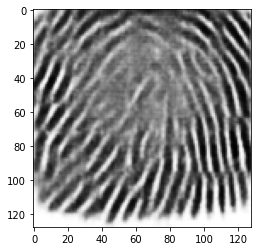

In [3]:
#get the generator (VAE)
DATASET = 'CAPACITIVE'
VAE_SIZE = 16
vae_gen = keras.models.load_model(f"../autoencoder_models/print_{DATASET}_var_decoder-{VAE_SIZE}.h5")

fake_print = vae_gen.predict(np.random.normal(0,1,size=(1,100)))
plt.imshow(fake_print.squeeze(),cmap='binary')

In [5]:
v.score(fake_print,"capacitive",35)
v.score(X_train[0],"capacitive",35)

['./MasterPrintMatchImageCapacitive', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/MOD-Verifinger_SDK/DB7AuthentecCapacitivePress/', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/spoof_print_temp.png_featurelarge.dat', '35']


NameError: name 'X_train' is not defined

In [6]:
#test verifinger speed

#score 1 - totaled number of matched minutaie points 
#          (will be greater than FMR rate (ex. 1% : >= 35 minutiae for a successful match)
fmrs = [35,50,65,35]
s1_times = []
for f in fmrs:
    start_time = time.time()
    print(v.score(fake_print,"capacitive", f))
    s1_times.append(time.time() - start_time)

print("")
#score 2 - total uniquely matched subjects
s2_times = []
for f in fmrs:
    start_time = time.time()
    print(v.score2(fake_print,"capacitive", f))
    s2_times.append(time.time() - start_time)

#show times
print(f"SCORE 1 TIME: {s1_times}\tSCORE 2 TIMES: {s2_times}")

['./MasterPrintMatchImageCapacitive', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/MOD-Verifinger_SDK/DB7AuthentecCapacitivePress/', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/spoof_print_temp.png_featurelarge.dat', '35']


KeyboardInterrupt: 

--train 35--
CompletedProcess(args=['./MasterPrintMatchImageCapacitive', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/FINGERPRINT_DATASETS/DB7AuthentecCapacitivePress/', '/home/jupyter/Notebooks/Milk/DeepPrint2/Verifinger_SDK_Code/spoof_print_temp.png_featurelarge.dat', '35', '1'], returncode=0, stdout='Licenses for Biometrics.FingerExtraction,Biometrics.FingerMatching not available\n')
[]
--test 35--


KeyboardInterrupt: 

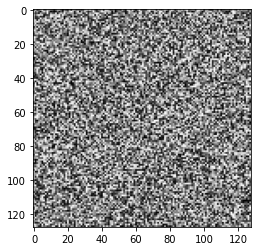

In [1]:
# try pure noise
import sub_verifinger as sv
import numpy as np
import matplotlib.pyplot as plt
import time

fake_print = np.random.random((128,128,1))
plt.imshow(fake_print.squeeze(),cmap='binary')

for FMR in [35,50,65]:
    st = time.time()
    print(f'--train {FMR}--')
    print(sv.usersMatched(fake_print,'capacitive',FMR,"temp","train"))
    print(f'--test {FMR}--')
    print(sv.usersMatched(fake_print,'capacitive',FMR,"temp","test"))
    print(f'--full {FMR}--')
    print(sv.usersMatched(fake_print,'capacitive',FMR,"temp"))
    print(time.time()-st)

In [ ]:
for FMR in [35,50,65]:
    st = time.time()
    print(f'--train {FMR}--')
    print(sv.usersMatched(real_print,'capacitive',FMR,"temp","train"))
    print(f'--test {FMR}--')
    print(sv.usersMatched(real_print,'capacitive',FMR,"temp","test"))
    print(f'--full {FMR}--')
    print(sv.usersMatched(real_print,'capacitive',FMR,"temp"))
    print(time.time()-st)

### 100 user sanity check experiment

['AES3400_0498_08.BMP' 'AES3400_0267_08.BMP' 'AES3400_0378_01.BMP'
 'AES3400_0703_04.BMP' 'AES3400_0708_08.BMP' 'AES3400_0238_03.BMP'
 'AES3400_0005_09.BMP' 'AES3400_0640_01.BMP' 'AES3400_0289_05.BMP'
 'AES3400_0083_09.BMP'] => [497, 266, 377, 702, 707, 237, 4, 639, 288, 82]


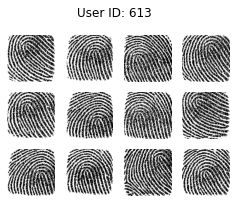

In [21]:
#sort by user id
y_clean = list(map(lambda x: int(x.split("_")[1])-1,y_train))
print(f"{y_train[:10]} => {y_clean[:10]}")


print_dict = {}
for i in range(len(X_train)):
    if y_clean[i] not in print_dict:
        print_dict[y_clean[i]] = []
    print_dict[y_clean[i]].append(X_train[i])
    
import random
user_id = random.randint(0,720)
#user_id = 23

fig = plt.figure(figsize=(4, 4))
fig.suptitle(f"User ID: {user_id}")

for i in range(len(print_dict[user_id])):
    plt.subplot(4, 4, i+1)
    plt.imshow(print_dict[user_id][i], cmap='binary')
    plt.axis('off')

plt.show()

In [42]:
from tqdm import tqdm

user100 = np.random.choice(range(720),100)
FMRs = [35,50,60]
acc = {}
matches = {}
for FMR in FMRs:
    matches[FMR] = {}

for FMR in FMRs:
    print(f" ------  FMR: {FMR}  ------")
    with tqdm(total=len(user100)) as pbar:
        for userID in user100:
            randUserImg = np.array(print_dict[userID])[np.random.choice(len(np.array(print_dict[userID])),1)].squeeze()
            usersMatch = sv.usersMatched(randUserImg,'capacitive',FMR)
            matches[FMR][userID] = usersMatch
            pbar.update(1)

  0%|          | 0/100 [00:00<?, ?it/s]

 ------  FMR: 35  ------


  0%|          | 0/100 [00:00<?, ?it/s]

 ------  FMR: 50  ------


  0%|          | 0/100 [00:00<?, ?it/s]

 ------  FMR: 60  ------


100%|██████████| 100/100 [14:14<00:00,  8.54s/it]


In [48]:
for FMR in FMRs:
    acc = 0
    nm = []
    for k,v in matches[FMR].items():
        if str(k) in v:
            acc += 1
        nm.append(len(v))
    print(acc/100)
    print(np.average(np.array(nm)))
    print("")

0.89
24.612903225806452

0.85
3.032258064516129

0.7
1.2580645161290323



In [49]:
print(matches[60])

{370: array(['220', '370'], dtype='<U3'), 715: array(['316', '715'], dtype='<U3'), 226: array(['226'], dtype='<U3'), 178: array(['178', '714'], dtype='<U3'), 361: array(['361'], dtype='<U3'), 43: array(['43', '208'], dtype='<U3'), 283: array(['283'], dtype='<U3'), 675: array(['675'], dtype='<U3'), 719: [], 163: array(['163'], dtype='<U3'), 10: array(['10'], dtype='<U2'), 524: [], 9: [], 429: [], 340: array(['340'], dtype='<U3'), 704: array(['704'], dtype='<U3'), 197: array(['197'], dtype='<U3'), 247: [], 195: array(['88', '136', '195', '582'], dtype='<U3'), 314: array(['314'], dtype='<U3'), 133: [], 355: array(['43', '161', '355', '455', '619'], dtype='<U3'), 464: array(['464'], dtype='<U3'), 232: [], 705: [], 610: array(['610'], dtype='<U3'), 691: array(['691'], dtype='<U3'), 674: array(['455', '674'], dtype='<U3'), 246: array(['246', '495'], dtype='<U3'), 173: array(['173'], dtype='<U3'), 490: array(['490'], dtype='<U3'), 461: [], 703: array(['703'], dtype='<U3'), 113: array(['113'],